<a href="https://colab.research.google.com/github/mkhetan/ph2_session2/blob/master/EVA_P2S2_File_0_orig.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Flatten, Dropout, BatchNormalization

Using TensorFlow backend.


In [0]:
# convert into dataset matrix
def convertToMatrix(data, step):
 X, Y =[], []
 for i in range(len(data)-step):
  d=i+step  
  X.append(data[i:d,])
  Y.append(data[d,])
 return np.array(X), np.array(Y)

In [0]:
# Original step was 4... increasing it to 32 improved loss many times!!!
step = 32
N = 1000    
Tp = 800    

t=np.arange(0,N)
x=np.sin(0.02*t)+2*np.random.rand(N)
df = pd.DataFrame(x)
df.head()

,0
0,1.111823
1,1.034836
2,0.079563
3,1.651580
4,1.495966


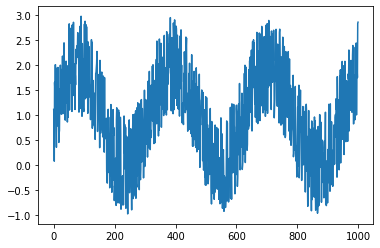

In [0]:
plt.plot(df)
plt.show()

In [0]:
values=df.values

# splitting the dataset into train and test
# train has first Tp rows and test has Tp to N

train,test = values[0:Tp,:], values[Tp:N,:]

# add step elements into train and test

test = np.append(test,np.repeat(test[-1,],step))
train = np.append(train,np.repeat(train[-1,],step))
 
trainX,trainY =convertToMatrix(train,step)
testX,testY =convertToMatrix(test,step)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [0]:
print(trainX)

[[[ 1.11182264  1.03483577  0.07956266 ...  2.17541495  1.02486361
    1.80875905]]

 [[ 1.03483577  0.07956266  1.65157969 ...  1.02486361  1.80875905
    2.00061895]]

 [[ 0.07956266  1.65157969  1.49596597 ...  1.80875905  2.00061895
    1.17003031]]

 ...

 [[ 0.38516578 -0.23633361 -0.12238862 ... -0.12238862 -0.12238862
   -0.12238862]]

 [[-0.23633361 -0.12238862 -0.12238862 ... -0.12238862 -0.12238862
   -0.12238862]]

 [[-0.12238862 -0.12238862 -0.12238862 ... -0.12238862 -0.12238862
   -0.12238862]]]


In [0]:
model = Sequential()

# Feeding 1 row at a time to simpleRNN
#model.add(SimpleRNN(units=32, input_shape=(1,step), activation="relu"))
# The following works... step was increased to 32 - loss became 15% :-)
model.add(SimpleRNN(units=32, input_shape=(1,step), activation="relu"))

# Because RNN feeds the o/p back to i/p... the number of wieghts / paramenters
# input = 32, hidden "units" = 32 + 1, o/p = 33 - so new input is 32+33 = 65..
# so parameters = 65*32 = 2080
# now what if it was Dense? compilation fails... that's fine
#model.add(Dense(32, input_shape=(1,step), activation="relu"))
#model.add(Flatten())
# Fully connected layers
# Slight improvement because of Batch Norm etc...
#model.add(BatchNormalization())
#model.add(Dropout(0.1))
model.add(Dense(8, activation="relu")) 
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')
# this did not help much
#model.compile(loss='binary_crossentropy', optimizer='adam')

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 264       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 9         
Total params: 2,353
Trainable params: 2,353
Non-trainable params: 0
_________________________________________________________________


In [0]:
#model.fit(trainX,trainY, epochs=100, batch_size=16, verbose=2)
# batch increased to 128 loss went up to 25%
#model.fit(trainX,trainY, epochs=100, batch_size=128, verbose=2)
# increased both batch size and epochs! loss 10% :-)
model.fit(trainX,trainY, epochs=500, batch_size=128, verbose=2)

trainPredict = model.predict(trainX)
testPredict= model.predict(testX)
predicted=np.concatenate((trainPredict,testPredict),axis=0)

trainScore = model.evaluate(trainX, trainY, verbose=0)
print(trainScore)

Epoch 1/500
 - 0s - loss: 0.2511
Epoch 2/500
 - 0s - loss: 0.2507
Epoch 3/500
 - 0s - loss: 0.2463
Epoch 4/500
 - 0s - loss: 0.2439
Epoch 5/500
 - 0s - loss: 0.2420
Epoch 6/500
 - 0s - loss: 0.2538
Epoch 7/500
 - 0s - loss: 0.2439
Epoch 8/500
 - 0s - loss: 0.2377
Epoch 9/500
 - 0s - loss: 0.2449
Epoch 10/500
 - 0s - loss: 0.2380
Epoch 11/500
 - 0s - loss: 0.2392
Epoch 12/500
 - 0s - loss: 0.2438
Epoch 13/500
 - 0s - loss: 0.2399
Epoch 14/500
 - 0s - loss: 0.2394
Epoch 15/500
 - 0s - loss: 0.2336
Epoch 16/500
 - 0s - loss: 0.2335
Epoch 17/500
 - 0s - loss: 0.2361
Epoch 18/500
 - 0s - loss: 0.2342
Epoch 19/500
 - 0s - loss: 0.2336
Epoch 20/500
 - 0s - loss: 0.2334
Epoch 21/500
 - 0s - loss: 0.2355
Epoch 22/500
 - 0s - loss: 0.2401
Epoch 23/500
 - 0s - loss: 0.2279
Epoch 24/500
 - 0s - loss: 0.2311
Epoch 25/500
 - 0s - loss: 0.2284
Epoch 26/500
 - 0s - loss: 0.2396
Epoch 27/500
 - 0s - loss: 0.2286
Epoch 28/500
 - 0s - loss: 0.2243
Epoch 29/500
 - 0s - loss: 0.2305
Epoch 30/500
 - 0s - lo

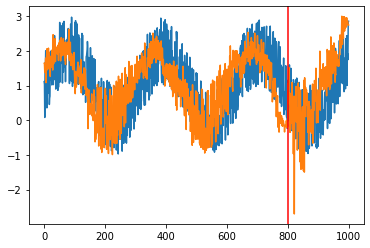

In [0]:
index = df.index.values
plt.plot(index,df)
plt.plot(index,predicted)
plt.axvline(df.index[Tp], c="r")
plt.show()